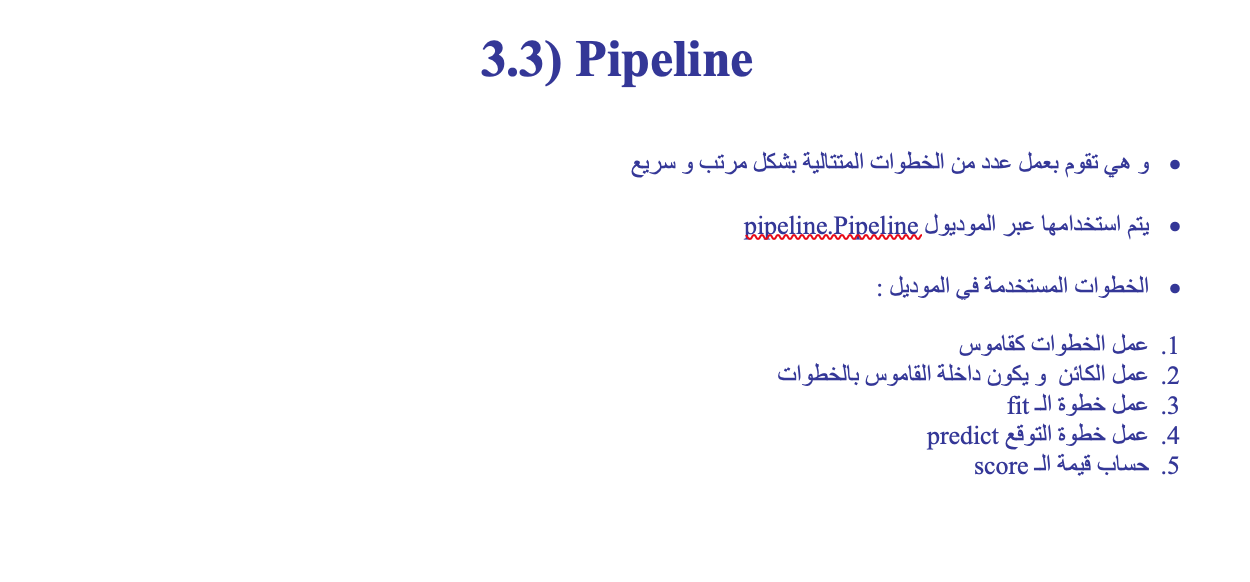

In [1]:
from IPython.display import Image
Image(filename='8.png')

### Example 1

In [2]:
#Import Libraries
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


/Users/fox/anaconda3/envs/newEnv/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
#load boston data

BostonData = load_boston()

#X Data
X = BostonData.data

#y Data
y = BostonData.target


In [4]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)


In [15]:
#Applying Pipeline :  
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [11]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('regressor', LinearRegression())
    
]
PipelineModel = Pipeline(steps)
PipelineModel.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [12]:
#Calculating Details
print('Pipeline Model Train Score is : ' , PipelineModel.score(X_train, y_train))
print('Pipeline Model Test Score is : ' , PipelineModel.score(X_test, y_test))


Pipeline Model Train Score is :  0.9387136936119839
Pipeline Model Test Score is :  0.5829424580544948


In [13]:
#Calculating Prediction
y_pred = PipelineModel.predict(X_test)
print('Predicted Value for Pipeline Model is : ' , y_pred[:10])


Predicted Value for Pipeline Model is :  [15.66796875 14.18261719 21.46679688 30.97558594  8.92578125 34.44824219
 19.23632812 22.28710938 27.37402344 25.41015625]


### Example 2

In [14]:
import pandas as pd
import math

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


/Users/fox/anaconda3/envs/newEnv/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [20]:
# importing data
data = pd.read_csv('train.csv', index_col='ID')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [22]:
#see the columns in our data
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 506
Data columns (total 14 columns):
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(3)
memory usage: 39.0 KB


In [23]:
#create our X and y
X = data.drop('medv', axis=1)
y = data['medv']


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)


In [27]:
# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print('Training score: {}\n'.format(lr_model.score(X_train, y_train)))
print('Test score: {}\n'.format(lr_model.score(X_test, y_test)))

y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}\n'.format(rmse))


Training score: 0.7268827869293253

Test score: 0.725468795925454

RMSE: 4.587100299689451



In [28]:
# pipline model
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
]

pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)

print('Training score: {}'.format(pipeline.score(X_train, y_train)))
print('Test score: {}'.format(pipeline.score(X_test, y_test)))


Training score: 0.9475767600691032
Test score: 0.46762684971879986


In [29]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=10, fit_intercept=True)) # Regularization
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

print('Training Score: {}'.format(ridge_pipe.score(X_train, y_train)))
print('Test Score: {}'.format(ridge_pipe.score(X_test, y_test)))


Training Score: 0.9181086448043114
Test Score: 0.828745091372282


In [32]:
steps = [
    ('scalar', StandardScaler()),   
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.3, fit_intercept=True)) # Regularization
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

print('Training score: {}'.format(lasso_pipe.score(X_train, y_train)))
print('Test score: {}'.format(lasso_pipe.score(X_test, y_test)))



Training score: 0.8483818643379695
Test score: 0.8307977758339726


### Example 3

In [45]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline


In [46]:
digits = datasets.load_digits()
X_tr = digits.data[:1200,:]
y_tr = digits.target[:1200]
X_ts = digits.data[1200:,:]
y_ts = digits.target[1200:]

In [47]:
logistic = SGDClassifier(loss='log', penalty='l2', 
                         max_iter=10000, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
pipe.fit(X_tr, y_tr)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logistic',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='log',
                               max_iter=10000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=0,
                               shuffle=True, tol=1e-05, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [48]:
print("Train Score (CV score=%0.3f):" % pipe.score(X_tr, y_tr))
print("Test Score (CV score=%0.3f):" % pipe.score(X_ts, y_ts))


Train Score (CV score=0.993):
Test Score (CV score=0.901):


In [49]:
y_pred = pipe.predict(X_ts)


[[55  0  0  0  1  1  2  0  0  0]
 [ 0 46  0  1  0  0  1  0  3 10]
 [ 2  0 58  0  0  0  0  0  0  0]
 [ 0  2  0 48  0  2  0  4  6  0]
 [ 1  0  0  0 56  0  1  0  1  2]
 [ 0  1  1  0  0 56  1  0  0  0]
 [ 0  1  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  1  0  0 56  2  2]
 [ 0  2  0  1  1  1  0  0 49  1]
 [ 0  2  0  1  0  0  0  0  1 54]]


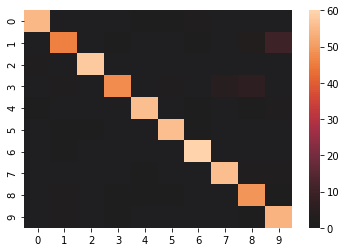

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_ts, y_pred)
print(cm)
import seaborn as sns
sns.heatmap(cm, center=True)


### Example 4

In [51]:
import numpy as np
#import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [52]:
# Define a pipeline to search for the best combination of PCA truncation
digits = datasets.load_digits()

# and classifier regularization.
logistic = SGDClassifier(loss='log', penalty='l2', 
                         max_iter=10000, tol=1e-5, random_state=0)
pca = PCA()

pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])


In [53]:
X_tr = digits.data[:1200,:]
y_tr = digits.target[:1200]
X_ts = digits.data[1200:,:]
y_ts = digits.target[1200:]


In [54]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {'pca__n_components': [5, 20, 30, 40, 50, 64],
              'logistic__alpha': np.logspace(-4, 4, 5),}
              

search = GridSearchCV(pipe, param_grid, iid=False, cv=5,return_train_score=False)
search.fit(X_tr, y_tr)


/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        SGDClassifier(alpha=0.0001,
                                                      average=False,
                                                      class_weight=None,
                                                      early_stopping=False,
                                                      epsilon=0.1, eta0=0.0,
                                                      fit_intercept=True,
                               

In [55]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)


Best parameter (CV score=0.933):
{'logistic__alpha': 0.0001, 'pca__n_components': 50}
